# NFTInsight: Decoding NFTs through Event Logs for Price Forecasting

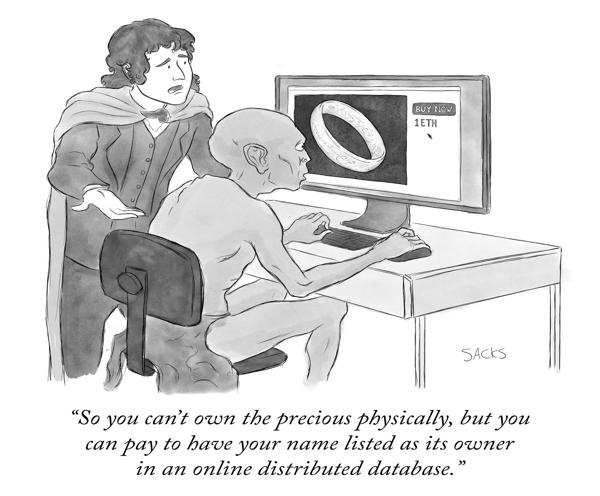

## Introduction

Q. What are NFTs?

A. NFTs, or Non Fungible Tokens, are unique digital identifiers recorded on a blockchain that verifiably certify ownership and authenticity. Unlike cryptocurrencies such as Ethereum, which are fungible and can be exchanged on a like-for-like basis, NFTs are non-fungible, meaning they are unique and cannot be replaced with something else. They can represent digital or real-world assets such as art, music, tickets, in-game items, and videos. NFTs gained popularity for their ability to digitally certify ownership and authenticity. They are traded online in marketplaces such as OpenSea, Blur and Looksrare, with value denominated in ETH. NFTs are in use in various industries, including art, music, gaming, and entertainment, and are a subject that elicits excitement and criticism in equal measure.

Q. What is a blockchain?

A. A blockchain is a distributed database or ledger whose state is shared among individual computers known as nodes in the network. Blockchain technology's most popular use case has been cryptocurrencies. They utilise the ledger to record transactions on the blockchain. Transactions  may be thought of as messages sent between two entities that may or may not transmit value between the sender and the reciever. These are bundled up in batches collected at ~ regular intervals then 'commited' to the rest of the other batches of transactions, thus block + chain. Cryptocurrencies program the chains to be immutable, once a record is written it cannot be undone after finality. Finality refers to the period it takes for recently added blocks to be considered settled. This time is measured in blocks and varies with block time. Once finality is achieved, the blockchain can no longer reorg, invalidating your transaction. It is adviced to wait for finality before concluding a transction is set. 

Q. How are NFTs "recorded on a blockchain"?

A. NFTs are recorded on a blockchain through a process called minting, where the asset's information is initialised, encrypted and recorded on the blockchain. This becomes a public record accessible to everyone to inspect traits like uniqueness and authenticity. Each NFT is created with a unique token ID and metadata, which act as proof of ownership for the individual who buys the NFT. Smart contracts, which are self-executing digital contracts, play a crucial role in managing and enhancing NFTs, as they control the ownership and transfer of NFTs, provide utility, and can automate transactions and operations when their conditions are met.

Q. What are smart contracts?

A. Smart contracts are arbitrary pieces of code stored on a blockchain with instructions that execute whenever a predetermined set of conditions is met. The code is typically in the form "if conditon is true then do...". Smart contracts are used to automate common actions such as exchanging tokens, making payments, transferring tokens and also managing items stored within the contract. Smart contracts have storage slots that enable them to store relevant context required for execution. The listen for inputs that will satisfy their logic and also emit relevant output required by other contracts or users of the blockchain. These emitted Events and Logs are necessary for the automatons to keep working.

Q. What are Events?

A. Smart contracts operate in an environment where every transaction,contract execution or state change is recorded. All this recorded information is stored in the form of Events and Logs living in nodes of the Ethereum blockchain. Think of it as a digital diary of every significant event of the Ethereum Network. Developers, analysts, creators, users and Enthusiasts alike will find this resource useful in decoding state changes happening within the smart contracts. Events can be subscribed to, answering questions like why execution happened, what or who initiated the transaction and what state changes happened.

Q. Why are Events important?

Events are used to log and notify external applications about specific actions that occur within the contract. Cryptocurrencies such as Ethereum promise their users immutability, transparency, decentralisation, and security of their assets. Logs and Events make it possible for anyone to analyse and audit transactions. Once an event is logged, it can not be edited or deleted. Events can also be used to debug and view smart contract interactions or track what is happening on the blockchain in real time. 

Q. Describe the structure of an event.

A. Events typically have the event name, a max of 3 indexed parameters logged in the transaction log which can be used to search and filter through events, and unindexed parameters only accessible through the transaction receipt. The parameters passed to the event are stored in the topics and data fields. These parameters are defined while writing the smart contract.


A sample event log as displayed in the Etherscan ui. Etherscan provides APIs for viewing transactions on Ethereum.
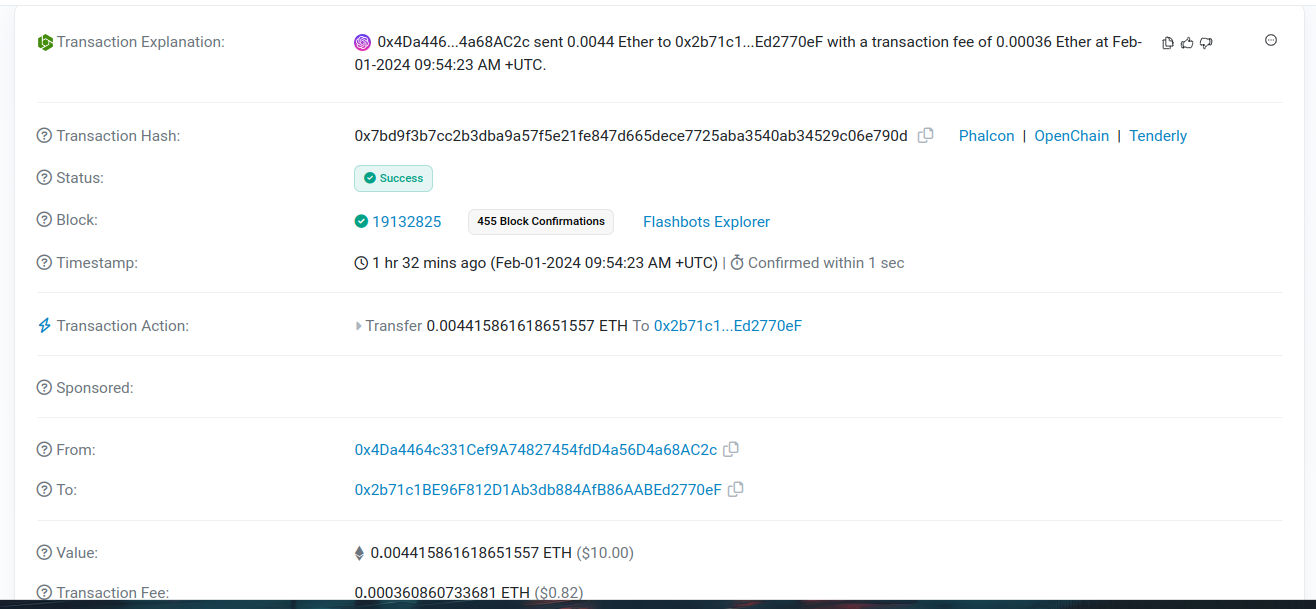

Some discernible fields include:
`Timestamp` refers to the block timestamp of the transaction where the event was emitted.`Transaction Hash` field refers to the hash of the transaction. `From` refers to the sender, while `To` refers to the reciever. `Value` refers to the amounts.

### Accessing Ethereum events.


Accessing Ethereum events involves retrieving and analysing the log data generated by events. After the blockchain accepts a transaction, the transaction receipt stores the events data in the logs field. Receipts can be accessed by querying a node locally or via a public or private rpc provider. The Ethereum RPC API can be considered a public API for interacting with the Ethereum blockchain. Ethereum nodes expose this API, allowing developers and applications to programmatically interact with the Ethereum network via a standard interface. 
We intent to download ethereum blocks using cryo. Cryo is the easiest way to extract blockchain data to parquet, csv, json, or a python dataframe. 

Run `pip install maturin`, `pip install cryo` commands if you don't already have cryo installed. 

In [ ]:
import cryo
import polars as pl 

In [ ]:
# set rpc
rpc_url = 'https://eth.merkle.io'

In [ ]:
cryo.freeze(
    "blocks",
    blocks = ['18297100:18397100'],
    include_columns =['size',],
    align=True,
    chunk_size=100,
    output_dir="./cryo_blocks",
    rpc=rpc_url
)

raw_transfers = pl.scan_parquet("cryo_blocks/*.parquet")

In [ ]:
contract_address = "0x6b175474e89094c44da98b954eedeac495271d0f"
topic0 = "0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef"
amount_scale = 1e18
# blocks = ['18244158:18245168']

In [ ]:
# download logs
# cryo.freeze(
#     "logs",
#     contract=contract_address,
#     topic0=topic0,
#     blocks = ['18244158:18247168'],
#     align=True,
#     chunk_size=100,
#     columns=["block_number", "data"],
#     sort=["block_number"],
#     output_dir="./cryo_logs",
#     rpc=rpc_url
# )
